In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os

# Replicate 1

In [2]:
os.chdir("/groups/gerlich/experiments/Experiments_004700/004750/Results")
data1 = pd.read_csv("exp4750_v1.csv")

## Parse conditions

In [3]:
data1.loc[:, "condition"] = data1["file"].apply(lambda x: " ".join(x.split(".lsm")[0].split("_")[:-1]))

## bg correct phospho-H2B --> 4.8 measured with Fiji

In [4]:
data1.loc[:, "ch3-n2_avg"] = data1["ch3-n2_avg"] - 4.8

## harmonize spelling between replicates

In [5]:
data1 = data1.replace("10mM", "10mM 4sT")
data1 = data1.replace("control", "Control")

## normalize to control

In [6]:
data1.loc[:, "ch3-n2_avg"] = data1["ch3-n2_avg"]/np.mean(data1.loc[data1["condition"] == "Control", "ch3-n2_avg"])

# Replicate 2

In [7]:
os.chdir("/groups/gerlich/experiments/Experiments_004600/004611/Analysis")

In [8]:
data2 = pd.read_csv("exp4611.csv")

In [9]:
data2.loc[:, "condition"] = data2["file"].apply(lambda x: " ".join(x.split(".lsm")[0].split("_")[:-1]))

In [10]:
data2.loc[:, "ch3-n2_avg"] = data2["ch3-n2_avg"] - 4.133 # bg measured by fiji

In [11]:
data2.loc[:, "ch3-n2_avg"] = data2["ch3-n2_avg"]/np.mean(data2.loc[data2["condition"] == "Control", "ch3-n2_avg"])

# Pool data

In [12]:
data = pd.concat((data1, data2))

conditions = ["Control", "2mM 4sT", "4mM 4sT",
              "6mM 4sT", "8mM 4sT", "10mM 4sT",
              "Etoposide"]


In [13]:
mean = data.groupby("condition").mean().reset_index()

In [14]:
mean1 = data1.groupby("condition").mean().reset_index()
mean2 = data2.groupby("condition").mean().reset_index()
meanInd = pd.concat((mean1, mean2))

# Plot

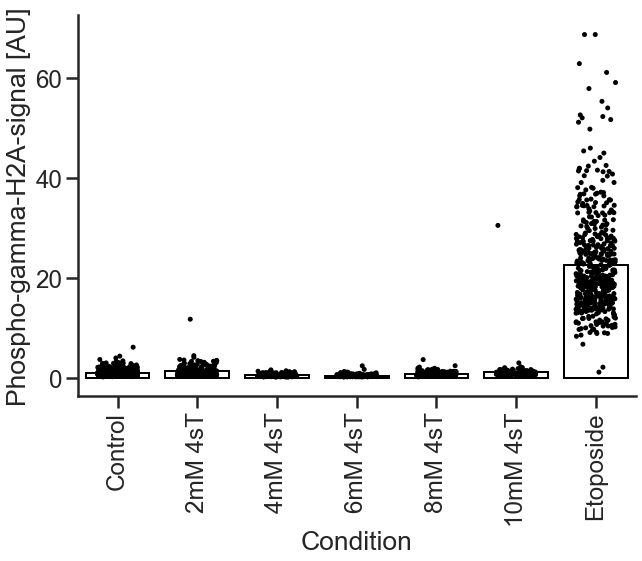

In [17]:
f, ax = plt.subplots()
sbn.barplot(x="condition", y="ch3-n2_avg", data=mean, ax=ax, color="black",facecolor=(1, 1, 1, 0),linewidth=2 ,edgecolor="black", order=conditions)
sbn.stripplot(x="condition", y="ch3-n2_avg", data=pd.concat((data1, data2)), color="black", size=5, jitter=0.25, ax=ax, order=conditions)
ax.set_ylabel("Phospho-gamma-H2A-signal [AU]")
ax.set_xlabel("Condition")
sbn.despine()
plt.xticks(*plt.xticks(), rotation=90)
sbn.despine()
f.set_size_inches(10, 7)
plt.show()

In [18]:
resultDir = "/groups/gerlich/experiments/Experiments_004700/004750/Results/"
f.savefig(os.path.join(resultDir, "PhosphoGamma_wPoints.png"))
f.savefig(os.path.join(resultDir, "PhosphoGamma_wPoints.pdf"))